# Chapter07. 군집화
## [01] K-평균 알고리즘 이해

: **K-평균**은 군집화에서 가장 일반적으로 사용되는 알고리즘. 

: 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법. -> 반복적으로 수행하다가 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화.
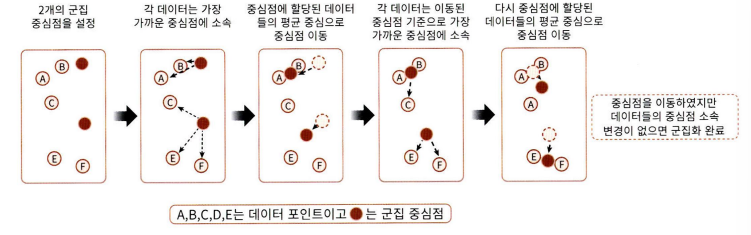

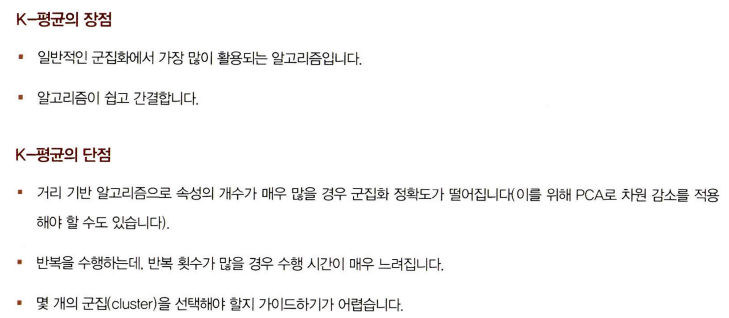

**[사이킷런 KMeans 클래스 소개]**

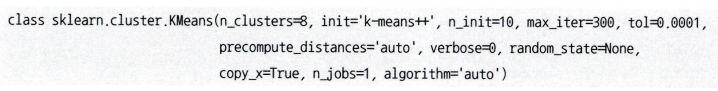

 - n_clusters : 군집화할 개수, 군집 중심점의 개수를 의미
 - init : 초기에 군집 중심점의 좌표를 설정할 방식

**[K-평균을 이용한 붓꽃 데이터 세트 군집화]**

: 붓꽃의 꽃받침과 꽃잎길이와 너비에 따른 품종을 분류하는 데이터 세트.

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, random_state=0)
kmeans.fit(irisDF)

C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 되었는지 확인.

In [5]:
irisDF['target']= iris.target
irisDF['cluster']= kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


붓꽃 데이터 세트의 군집화를 시각화.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x']= pca_transformed[:,0]
irisDF['pca_y']= pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


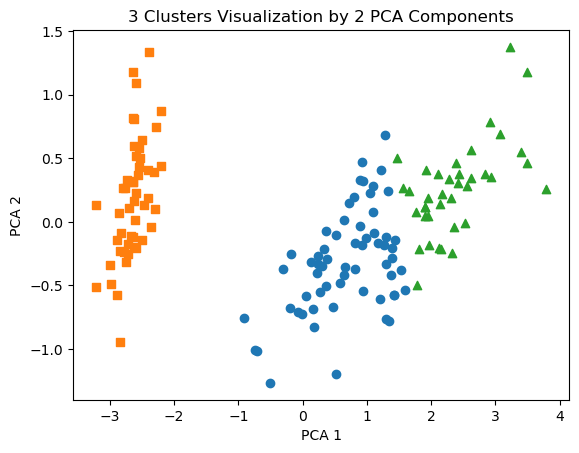

In [7]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

**[군집화 알고리즘 테스트를 위한 데이터 생성]**

 : 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클레스에 여러 개의 군집이 분포될 수 있게 데이터를 생성

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


 - make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

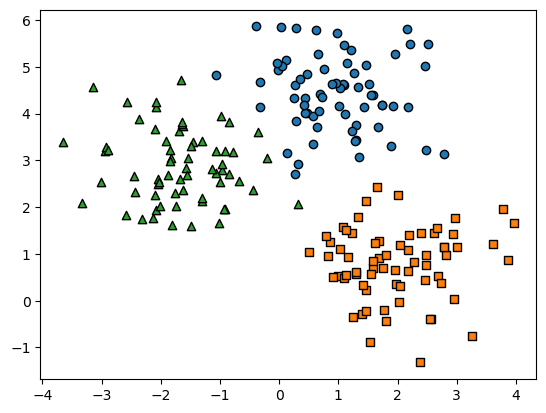

In [11]:
target_list = np.unique(y)

#각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], 
                edgecolor='k', marker=markers[target])
plt.show()
    

------------------------------------
이 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화.
 - KMeans 객체에 fit_transform(X)를 수행해 make_blobs()의 피처 데이터 세트인 X데이터를 군집화.
 - KMeans 객체의 cluster_centers_속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용.

C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


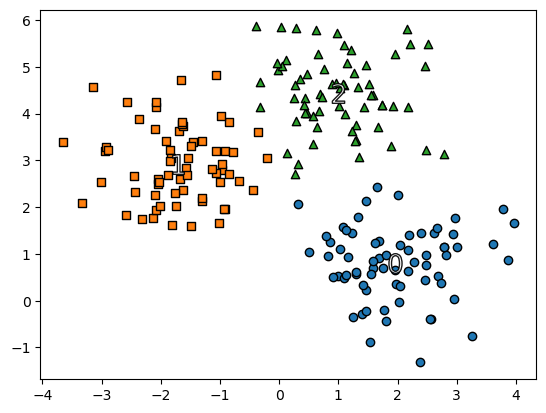

In [12]:
# kmeans 객체를 이용해 x 데이터를 kmeans 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'X']

# 군집된 label 유형별로 반복하면서 marker별로 scatter plot
for label in unique_labels :
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y= label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x = center_x_y[0], y= center_x_y[1], s=200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = '$%d$' %label)

In [13]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: kmeans_label, dtype: int64


## [02] 군집평가

대부분의 군집화 데이터 세트는 위의 데이터처럼 타깃 레이블을 가지고 있지 않음. 

그렇다면 군집화가 잘 되었는지 평가할 수 있는 대표적인 방법으로는 실루엣 분석이 있음.

**[실루엣 분석의 개요]**

: 실루엣 분석은 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄.
 - 실루엣 분석은 실루엣 계수를 기반으로 함. 실루엣 계수는 해당데이터가 같은 군집 내의 데이터와 얼마나 가깝게, 다른 군집에 있는 데이터와 얼마나 멀리 분리되어 있는지 나타냄.

**[붓꽃 데이터 세트를 이용한 군집 평가]**

In [14]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값 구하기 위한 API
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state=9).fit(irisDF)
irisDF['cluster'] = kmeans.labels_
# iris의 모든 실루엣 계수 값 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_sample return 값의 shape : ', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples
# 모든 데이턴의 평균 실룽ㅅ 계수 값
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트의 실루엣 평균 점수 : {0:.3f}'.format(average_score))

irisDF.head(3)

C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette_sample return 값의 shape :  (150,)
붓꽃 데이터 세트의 실루엣 평균 점수 : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315


In [15]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.798140
1    0.451105
2    0.417320
Name: silhouette_coeff, dtype: float64

**[군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법]**

전체 데이터의 평균 실루엣계수의 값이 높다고 해서 반드시 최적의 군집 개수로 군집화로 잘 되었다고 볼 수 없음.

->.개별 군집별로 적당히 분리된 거리를 유지하면서 군집 내의데이터가 서로 뭉쳐 있는 경우, k-평균의 적절하나 군집개수가 설정되었다고 판단.

--------------------------------------

여러개의 군집 개수가 주어졌을 때 평균 실루엣 계수로 군집 개수를 최적화하는 방법.
 - 군집의 개수를 2개로 정했을 때, 실루엣 계수는 굉장히 높음. 
     - 1번 군집의 모든 데이터는 평균 실루엣 계수의 값 이상이지만 2번 군집의 경우는 평균보다 적은 데이터 값이 매우 많음. 
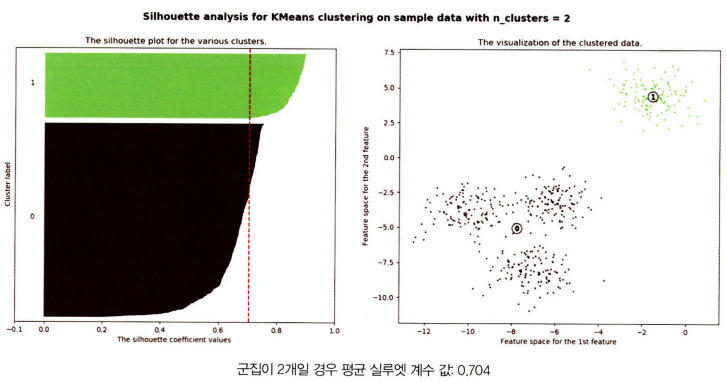

 - 군집 개수가 3개일때, 전체 데이터의  평균 실루엣 계수 값은 0.588. 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮음.
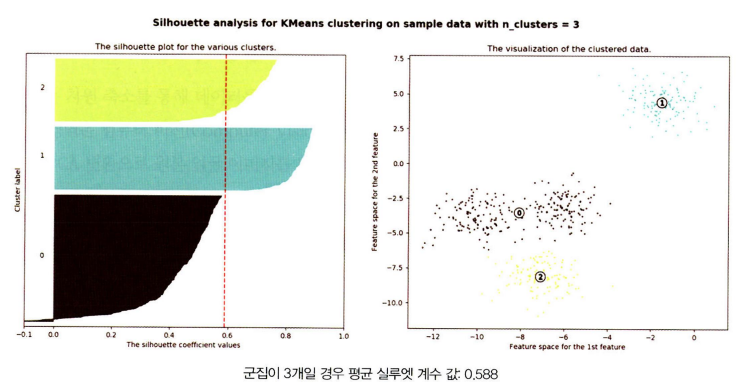

 - 군집이 4개인 경우일때, 평균 실루엣 계수값은 0.65.
     - 개별 군집의 평균 실루엣 계수의 값이 비교적 균일하게 위치. 
     => 평균 실루엣계수의 값은 작지만 군집이 4개인 경우가 가장 이상적인 군집화 개수.
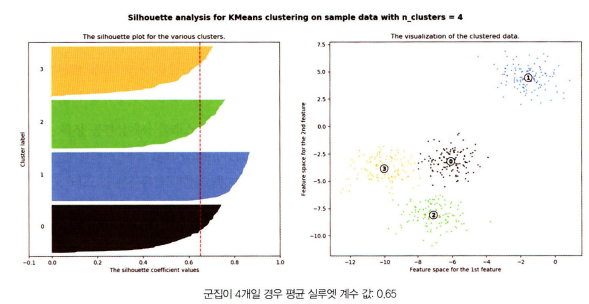

왼쪽 그림의 군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수로 만들어 이를 시각화.
 - visualize_silhouette() 함수는 군집 개수를 변화시키면서 평균 군집을 수행.
 - make_blobs() 함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트를 만들고 이를 k-평균으로 군집화.-> 최적의 군집 개수를 시각화로 알아보자

C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

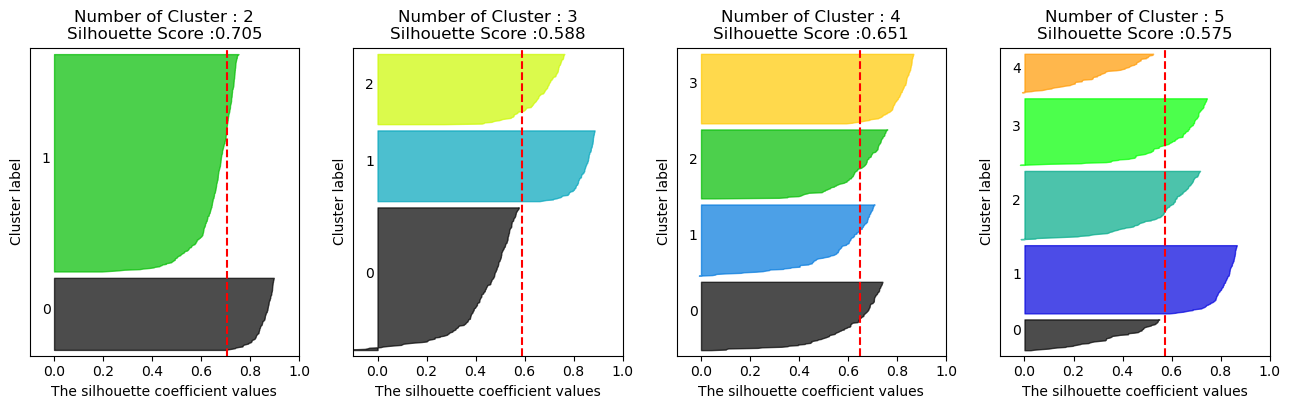

In [18]:
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

        
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

=> 4개의 군집이 가장 최적이 됨. 

 - 붓꽃 데이터를 이용해 k-평균 데이터를 이용해 k-평균 수행시 최적의 군집 개수를 알아보자

C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\june0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

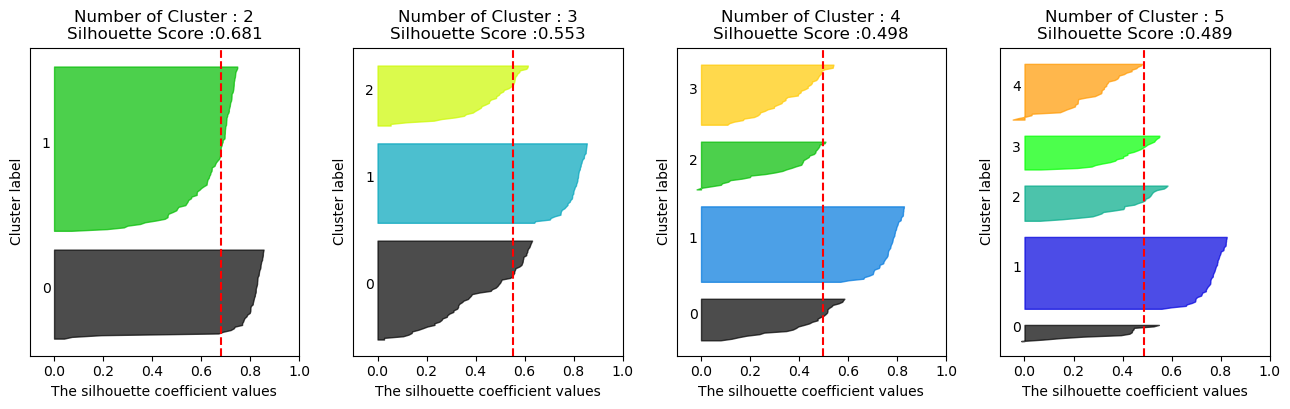

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

=> 군집개수를 2개로 하는 것이 가장 최적화.